In [1]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
tree = tree.DecisionTreeClassifier()
lr = LogisticRegression()
svc = SVC()
mlpc = MLPClassifier()

In [3]:
X = [[181, 80, 44], [177, 70, 43], [160, 60, 38], [154, 54, 37], [166, 65, 40],
     [190, 90, 47], [175, 64, 39],
     [177, 70, 40], [159, 55, 37], [171, 75, 42], [181, 85, 43]]

y = ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female',
     'female', 'male', 'male']

In [4]:
tree = tree.fit(X, y)
tree_p = tree.predict([[190, 70, 43]])
tree_p[0]

'male'

In [5]:
lr = lr.fit(X, y)
lr_p = lr.predict([[190, 70, 43]])
lr_p[0]

'female'

In [6]:
svc = svc.fit(X, y)
svc_p = svc.predict([[190, 70, 43]])
svc_p[0]

'male'

In [7]:
mlpc = mlpc.fit(X, y)
mlpc_p = mlpc.predict([[190, 70, 43]])
mlpc_p[0]

'male'

In [8]:
import pandas as pd
data = pd.read_excel('dataEx1.xlsx')

In [9]:
data = data[['height', 'weight', 'shoe_size', 'sex_classification']]
data = data.dropna()
ukX = data[['height', 'weight', 'shoe_size']]
uky = data['sex_classification']
uky = uky.replace(1,'male')
uky = uky.replace(2,'female')

In [10]:
import numpy as np
ukX = np.asarray(ukX)
uky = np.asarray(uky)

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ukX, uky)

/home/fd/Dev/siraj/dschallenges/.env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.metrics import accuracy_score

In [13]:
tree = tree.fit(X_train, y_train)
tree_p = tree.predict(X_test)
accuracy_score(tree_p, y_test)

0.8571428571428571

In [14]:
lr = lr.fit(X_train, y_train)
lr_p = lr.predict(X_test)
accuracy_score(lr_p, y_test)

0.9285714285714286

In [15]:
svc = SVC(C=0.35, gamma=0.01, kernel='linear')
svc = svc.fit(X_train, y_train)
svc_p = svc.predict(X_test)
accuracy_score(svc_p, y_test)

0.9285714285714286

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
mlpc = MLPClassifier(hidden_layer_sizes=(4,), batch_size=2, max_iter=1000, random_state=3)
mlpc = mlpc.fit(X_train, y_train)
mlpc_p = mlpc.predict(X_test)
accuracy_score(mlpc_p, y_test)

0.9642857142857143

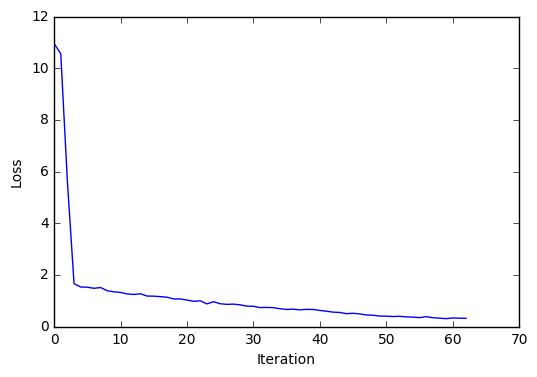

In [18]:
plt.plot(mlpc.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

vc = VotingClassifier(estimators=[('lr', lr), ('svc', svc), ('tree', tree), ('MLP', mlpc)], voting='hard')

for clf, label in zip([lr, svc, tree, mlpc], ['Logistic Regression', 'Support Vector Classifier', 'Decision Tree Classifier', 'Multi Layer Perceptron Classifier']):
    scores = cross_val_score(clf, ukX, uky, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

vc = vc.fit(X_train, y_train)
vc_p = vc.predict(X_test)
accuracy_score(vc_p, y_test)

Accuracy: 0.89 (+/- 0.09) [Logistic Regression]
Accuracy: 0.89 (+/- 0.11) [Support Vector Classifier]
Accuracy: 0.86 (+/- 0.09) [Decision Tree Classifier]
Accuracy: 0.86 (+/- 0.16) [Multi Layer Perceptron Classifier]


0.9285714285714286